# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

%matplotlib inline
sns.set()

# import Datasets

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Understanding Data

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
diabetes.sample(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
143,10,108,66,0,0,32.4,0.272,42,1
206,8,196,76,29,280,37.5,0.605,57,1
370,3,173,82,48,465,38.4,2.137,25,1
596,0,67,76,0,0,45.3,0.194,46,0
711,5,126,78,27,22,29.6,0.439,40,0
108,3,83,58,31,18,34.3,0.336,25,0
735,4,95,60,32,0,35.4,0.284,28,0
229,0,117,80,31,53,45.2,0.089,24,0
301,2,144,58,33,135,31.6,0.422,25,1
311,0,106,70,37,148,39.4,0.605,22,0


# Exploratory Data Analysis

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [8]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
diabetes.shape

(768, 9)

# Cleaning Data

# Dealing with Missing Data

In [12]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

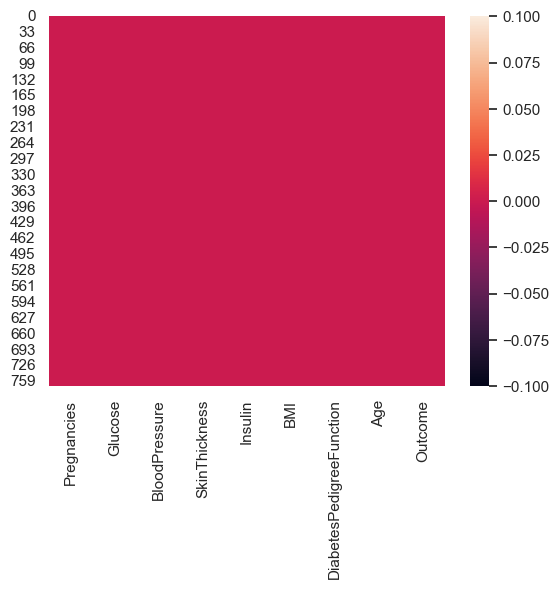

In [13]:
sns.heatmap(diabetes.isna())

# Dealing with Duplicated Data

In [15]:
diabetes.duplicated().sum()

0

# visualizing Data

In [41]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

C:\Users\EL_Garhy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


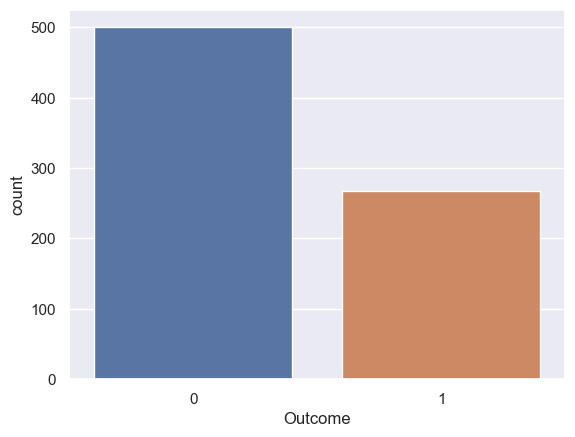

In [10]:
sns.countplot(diabetes.Outcome)
plt.show()

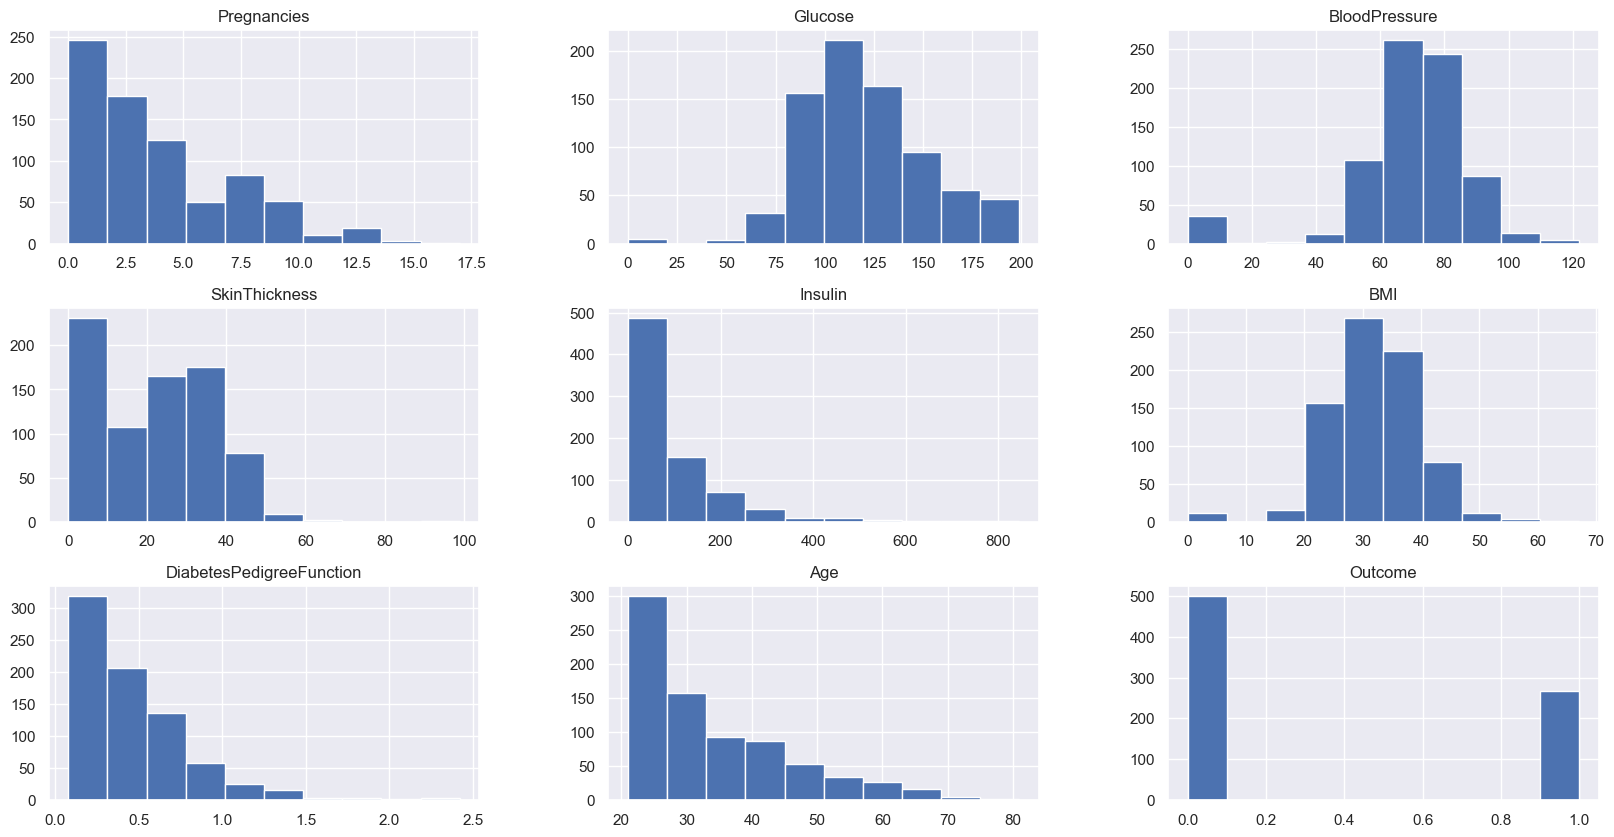

In [20]:
diabetes.hist(figsize=(20,10))
plt.show()

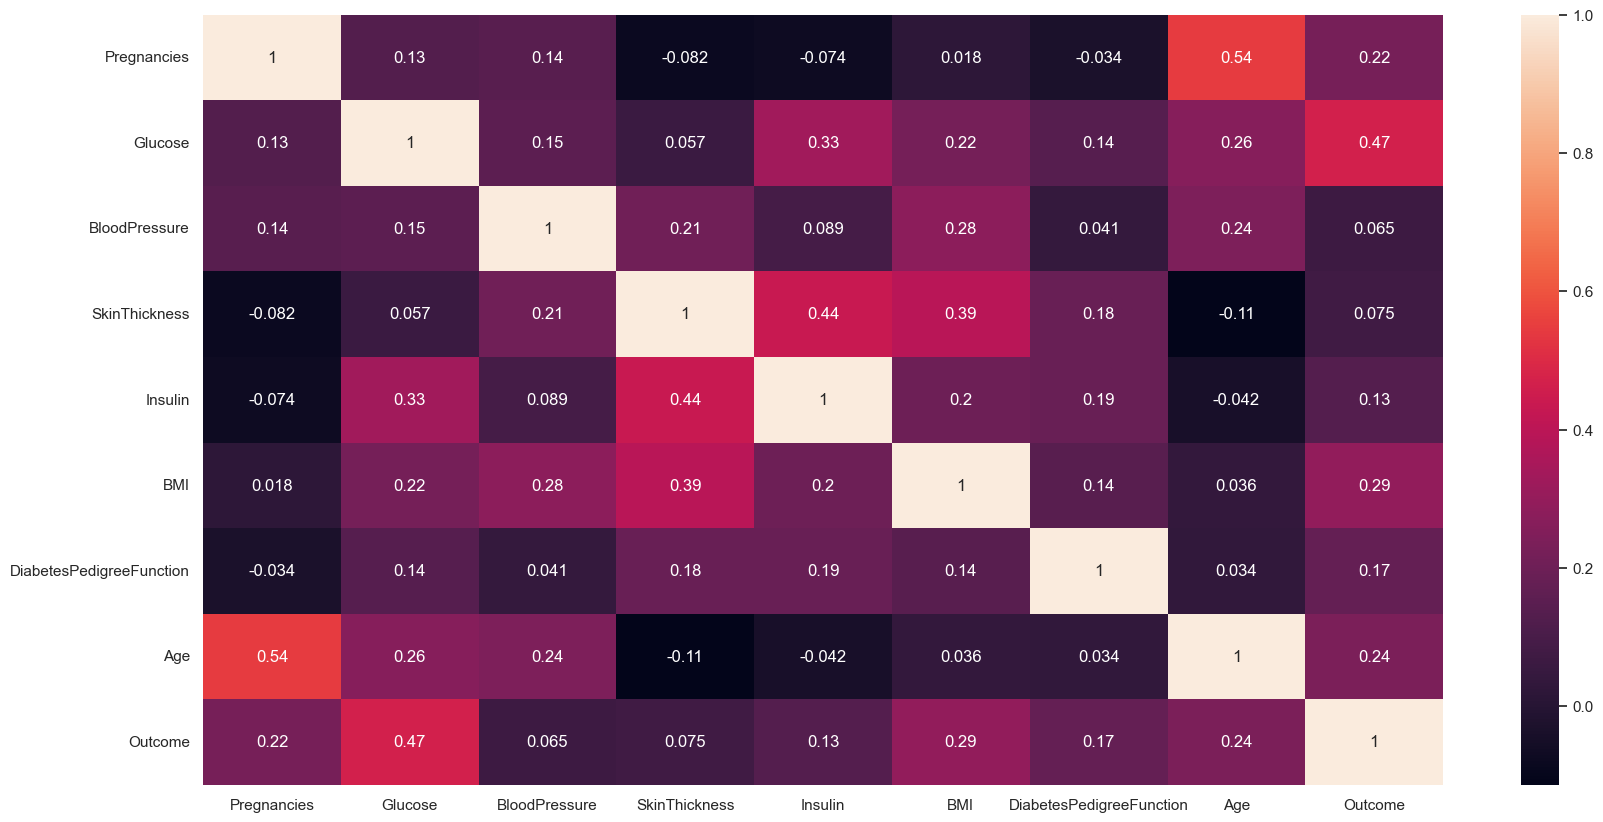

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(diabetes.corr(),annot=True)
plt.show()

<AxesSubplot:>

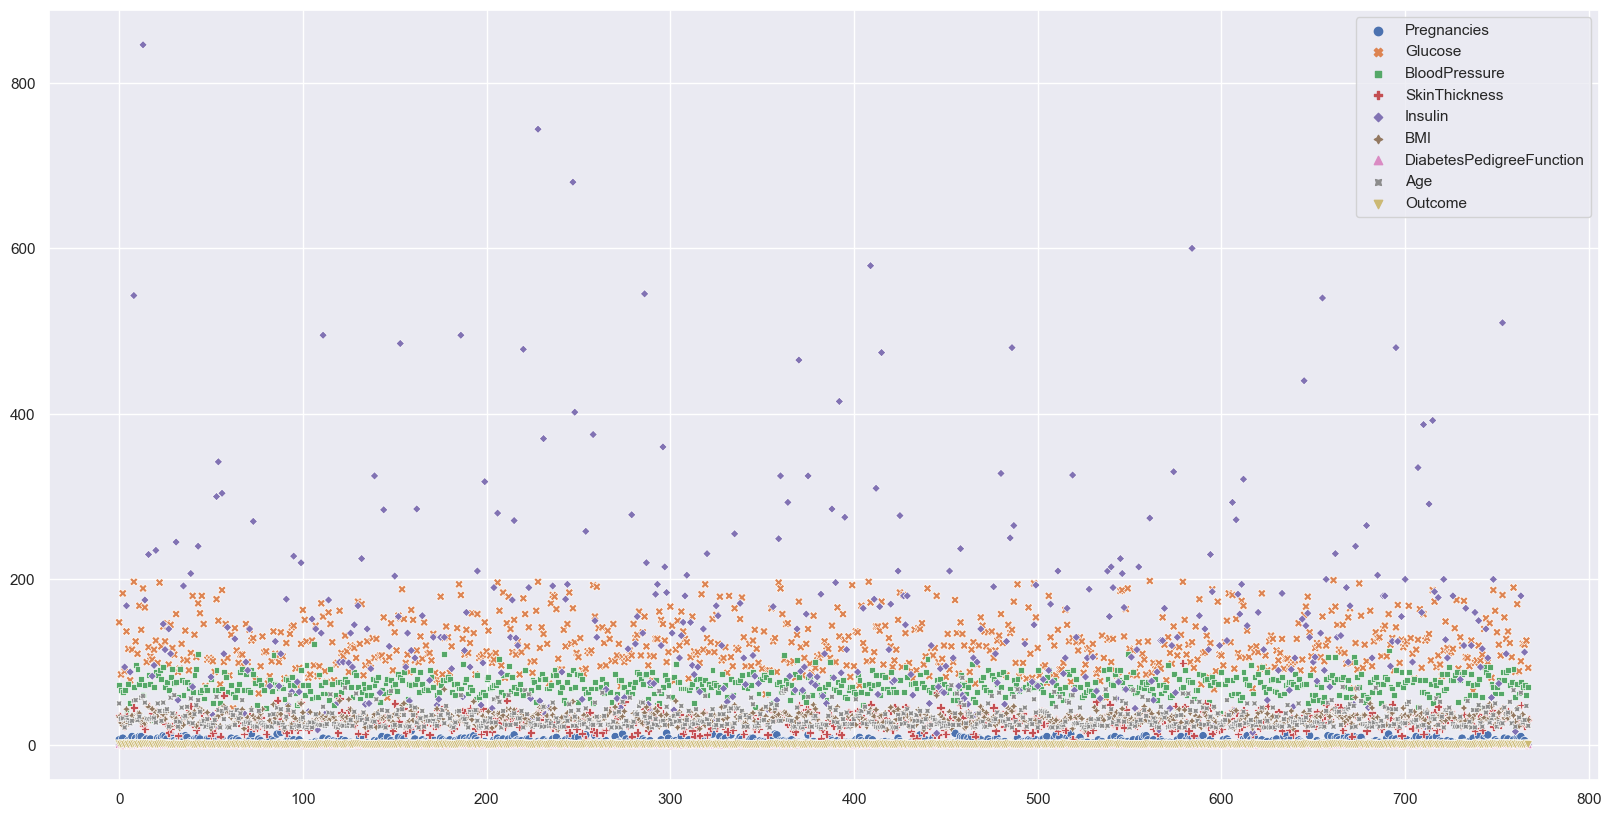

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=diabetes)

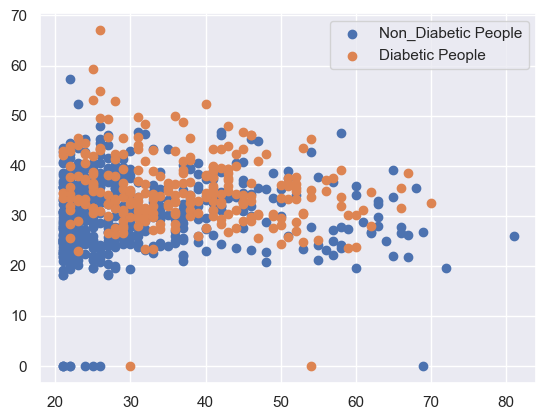

In [48]:
diabetic = diabetes[diabetes.Outcome == 1]
non_diabetic = diabetes[diabetes.Outcome == 0]

plt.scatter(non_diabetic.Age,non_diabetic.BMI,label='Non_Diabetic People')
plt.scatter(diabetic.Age,diabetic.BMI,label='Diabetic People')
plt.legend()
plt.show()

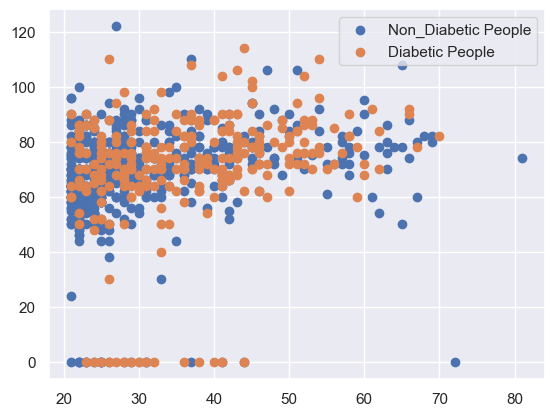

In [49]:
diabetic = diabetes[diabetes.Outcome == 1]
non_diabetic = diabetes[diabetes.Outcome == 0]

plt.scatter(non_diabetic.Age,non_diabetic.BloodPressure,label='Non_Diabetic People')
plt.scatter(diabetic.Age,diabetic.BloodPressure,label='Diabetic People')
plt.legend()
plt.show()

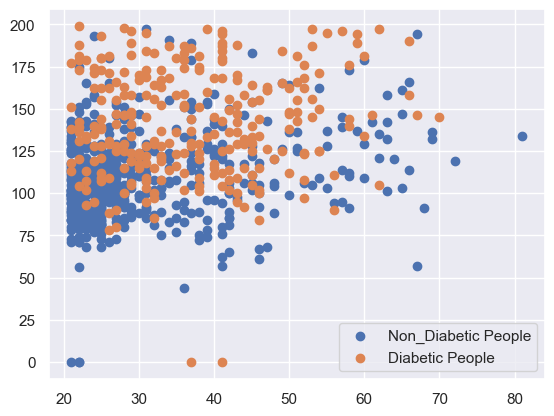

In [50]:
diabetic = diabetes[diabetes.Outcome == 1]
non_diabetic = diabetes[diabetes.Outcome == 0]

plt.scatter(non_diabetic.Age,non_diabetic.Glucose,label='Non_Diabetic People')
plt.scatter(diabetic.Age,diabetic.Glucose,label='Diabetic People')
plt.legend()
plt.show()

# Feature Selection

# Spliting data

In [54]:
X = diabetes.iloc[:,:-1].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [53]:
y = diabetes.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

# Scaling data

In [55]:
std = StandardScaler()

In [56]:
X = std.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
print('shape of X_train: ',X_train.shape)

shape of X_train:  (614, 8)


In [135]:
print('shape of y_train: ',y_train.shape)

shape of y_train:  (614,)


In [136]:
print('shape of X_test: ',X_test.shape)

shape of X_test:  (154, 8)


In [137]:
print('shape of y_test: ',y_test.shape)

shape of y_test:  (154,)


# Building Model

# Suport Vector Classefier

In [138]:
svc = SVC(C=0.2)
svc.fit(X_train,y_train)
y_pridect_svc = svc.predict(X_test)
print('accuracy_score for Suport Vector Classefier = ',100*accuracy_score(y_test,y_pridect_svc),"%")
print('*'*70)
print('confusion_matrixe for Suport Vector Classefier\n\n',confusion_matrix(y_test,y_pridect_svc))
print('*'*70)
print('classification_report for Suport Vector Classefier\n\n',classification_report(y_test,y_pridect_svc))
print('*'*70)


accuracy_score for Suport Vector Classefier =  77.92207792207793 %
**********************************************************************
confusion_matrixe for Suport Vector Classefier

 [[88 11]
 [23 32]]
**********************************************************************
classification_report for Suport Vector Classefier

               precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.74      0.58      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

**********************************************************************


# K Neighbors Classifier

In [139]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pridect_knn = knn.predict(X_test)
print('accuracy_score for KNeighborsClassifier = ',100*accuracy_score(y_test,y_pridect_knn),"%")
print('*'*70)
print('confusion_matrixe for KNeighborsClassifier\n\n',confusion_matrix(y_test,y_pridect_knn))
print('*'*70)
print('classification_report for KNeighborsClassifier\n\n',classification_report(y_test,y_pridect_knn))
print('*'*70)


accuracy_score for KNeighborsClassifier =  70.12987012987013 %
**********************************************************************
confusion_matrixe for KNeighborsClassifier

 [[80 19]
 [27 28]]
**********************************************************************
classification_report for KNeighborsClassifier

               precision    recall  f1-score   support

           0       0.75      0.81      0.78        99
           1       0.60      0.51      0.55        55

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

**********************************************************************


C:\Users\EL_Garhy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Random Forest Classifier

In [140]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pridect_clf = clf.predict(X_test)
print('accuracy_score for RandomForestClassifier = ',100*accuracy_score(y_test,y_pridect_clf),"%")
print('*'*70)
print('confusion_matrixe for RandomForestClassifier\n\n',confusion_matrix(y_test,y_pridect_clf))
print('*'*70)
print('classification_report for RandomForestClassifier\n\n',classification_report(y_test,y_pridect_clf))
print('*'*70)


accuracy_score for RandomForestClassifier =  73.37662337662337 %
**********************************************************************
confusion_matrixe for RandomForestClassifier

 [[76 23]
 [18 37]]
**********************************************************************
classification_report for RandomForestClassifier

               precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

**********************************************************************


# Decision Tree Classifier

In [141]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pridect_tree = tree.predict(X_test)
print('accuracy_score for DecisionTreeClassifier = ',100*accuracy_score(y_test,y_pridect_tree),"%")
print('*'*70)
print('confusion_matrixe for DecisionTreeClassifier\n\n',confusion_matrix(y_test,y_pridect_tree))
print('*'*70)
print('classification_report for DecisionTreeClassifier\n\n',classification_report(y_test,y_pridect_tree))
print('*'*70)


accuracy_score for DecisionTreeClassifier =  75.32467532467533 %
**********************************************************************
confusion_matrixe for DecisionTreeClassifier

 [[76 23]
 [15 40]]
**********************************************************************
classification_report for DecisionTreeClassifier

               precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.63      0.73      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154

**********************************************************************
